#	1)Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2

In [3]:
import pandas as pd
import numpy as np

In [ ]:
Df=pd.DataFrame(columns=['Name of the Company','Measure X'])
Df

,Name of the Company,Measure X


In [ ]:
A=['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.','Lehman Brothers','Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways','Warner-Lambert']
B=[24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35]
Df['Name of the Company']=A
Df['Measure X']=B
Df

,Name of the Company,Measure X
0,Allied Signal,24.23
1,Bankers Trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P.Morgan & Co.,29.62
5,Lehman Brothers,28.25
6,Marriott,25.81
7,MCI,24.39
8,Merrill Lynch,40.26
9,Microsoft,32.95


import numpy as np
from google.colab import autoviz
df_3818693554777370927 = autoviz.get_registered_df('df_3818693554777370927')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3818693554777370927, *['Measure X'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2757264419682541231 = autoviz.get_registered_df('df_2757264419682541231')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2757264419682541231, *['Measure X'], **{})
chart

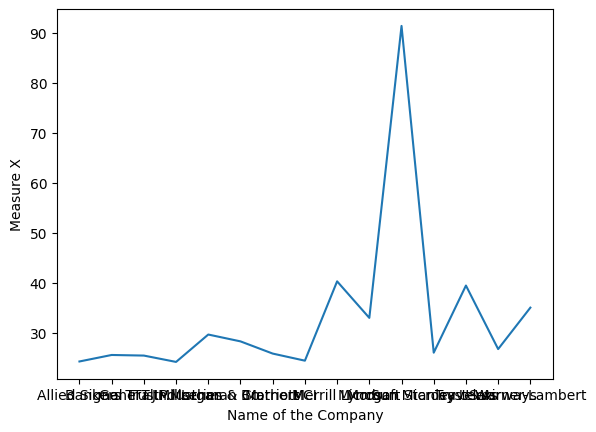

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Df['Name of the Company'],Df['Measure X'])
plt.xlabel('Name of the Company')
plt.ylabel('Measure X')
plt.show()

In [ ]:
Q1=Df['Measure X'].quantile(0.25)
Q3=Df['Measure X'].quantile(0.75)
IQR=Q3-Q1
IQR

8.505000000000003

In [ ]:
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print('lower bound:',lower_bound)
print('upper bound:',upper_bound)

lower bound: 12.712499999999995
upper bound: 46.7325


In [ ]:
Outliers=Df[(Df['Measure X']<lower_bound) | (Df['Measure X']>upper_bound)]
Outliers

,Name of the Company,Measure X
10,Morgan Stanley,91.36


Outliers are present. It's of the Company Morgan Stantely with measure 91.36%

In [ ]:
Mean=np.mean(Df['Measure X'])
Mean

33.27133333333333

In [ ]:
Variance=np.var(Df['Measure X'])
Variance

268.00350488888887

In [ ]:
Std=np.std(Df['Measure X'])
Std

16.370812590976932

**4)4.	AT&T was running commercials in 1990 aimed at luring back customers who had switched to one of the other long-distance phone service providers. One such commercial shows a businessman trying to reach Phoenix and mistakenly getting Fiji, where a half-naked native on a beach responds incomprehensibly in Polynesian. When asked about this advertisement, AT&T admitted that the portrayed incident did not actually take place but added that this was an enactment of something that “could happen.” Suppose that one in 200 long-distance telephone calls is misdirected. What is the probability that at least one in five attempted telephone calls reaches the wrong number? (Assume independence of attempts.)**

In [1]:
#p=the probability of long distance call being misdirected
p=1/200
#we have to find that at least one in five attempted telephone calls reaches the wrong number
n=5
#p(no attempted phone call in 5 attempts reaches the wrong number)=(1-p)^5
#atleast one out of 5 attempts reaches the wrong number is (1-(1-p)^5)
from scipy.stats import binom
print('the probability that at least one in five attempted telephone calls reaches the wrong number:',1-binom.pmf(0,n,p))

the probability that at least one in five attempted telephone calls reaches the wrong number: 0.02475124687812502


**5)	Returns on a certain business venture, to the nearest $1,000, are known to follow the following probability distribution**

In [4]:
Data=pd.DataFrame(columns=['x','p(x)'])
Data['x']=[-2000,-1000,0,1000,2000,3000]
Data['p(x)']=[0.1,0.1,0.2,0.2,0.3,0.1]
Data

,x,p(x)
0,-2000,0.1
1,-1000,0.1
2,0,0.2
3,1000,0.2
4,2000,0.3
5,3000,0.1


**(i)	What is the most likely monetary outcome of the business venture?**

In [5]:
value=Data.loc[Data['p(x)']==0.3].iloc[0]['x']
value

2000.0

**(ii)	Is the venture likely to be successful? Explain**

In [6]:
x=[-2000,-1000,0,1000,2000,3000]
p=[0.1,0.1,0.2,0.2,0.3,0.1]
mean=sum(s*r for s,r in zip(x,p))
mean
if mean>0:
  print('the venture is likely to be successful')
else:
  print('venture might not be successful')

the venture is likely to be successful


**(iii)	What is the long-term average earning of business ventures of this kind? Explain**

In [ ]:
x=[-2000,-1000,0,1000,2000,3000]
p=[0.1,0.1,0.2,0.2,0.3,0.1]
mean=sum(s*r for s,r in zip(x,p))
mean

800.0

**(iv)	What is the good measure of the risk involved in a venture of this kind? Compute this measure**

In [ ]:
total=sum((s**2)*r for s,r in zip(x,p))
var=(total-(mean**2))
print(var)
print('std:',np.sqrt(var))

2160000.0
std: 1469.6938456699068


Variance is very high. So, high risk is involved.